In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')

# LOGISTIC REGRESSION/LINEAR DISCRIMINANT ANALYSIS/DECISION TREE(CART)

In [1205]:
contra=pd.read_excel('C:/Users/hp/Desktop/python/Contraceptive_method_dataset.xlsx')

In [1206]:
contra.head().T

,0,1,2,3,4
Wife_age,24.0,45.0,43.0,42.0,36.0
Wife_ education,Primary,Uneducated,Primary,Secondary,Secondary
Husband_education,Secondary,Secondary,Secondary,Primary,Secondary
No_of_children_born,3.0,10.0,7.0,9.0,8.0
Wife_religion,Scientology,Scientology,Scientology,Scientology,Scientology
Wife_Working,No,No,No,No,No
Husband_Occupation,2,3,3,3,3
Standard_of_living_index,High,Very High,Very High,High,Low
Media_exposure,Exposed,Exposed,Exposed,Exposed,Exposed
Contraceptive_method_used,No,No,No,No,No


In [1207]:
contra.tail().T

,1468,1469,1470,1471,1472
Wife_age,33.0,33.0,39.0,33.0,17.0
Wife_ education,Tertiary,Tertiary,Secondary,Secondary,Secondary
Husband_education,Tertiary,Tertiary,Secondary,Secondary,Secondary
No_of_children_born,NaN,NaN,NaN,NaN,1.0
Wife_religion,Scientology,Scientology,Scientology,Scientology,Scientology
Wife_Working,Yes,No,Yes,Yes,No
Husband_Occupation,2,1,1,2,2
Standard_of_living_index,Very High,Very High,Very High,Low,Very High
Media_exposure,Exposed,Exposed,Exposed,Exposed,Exposed
Contraceptive_method_used,Yes,Yes,Yes,Yes,Yes


In [1208]:
print('Number of rows in a dataset =',contra.shape[0])
print('Number of columns in a dataset =',contra.shape[1])

Number of rows in a dataset = 1473
Number of columns in a dataset = 10


In [1209]:
contra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [1210]:
contra.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [1211]:
for i in col_cat:
    print(i.upper(),col_cat[i].nunique())
    print(col_cat[i].value_counts(),'\n')

WIFE_ EDUCATION 4
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64 

HUSBAND_EDUCATION 4
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64 

WIFE_RELIGION 2
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64 

WIFE_WORKING 2
No     1043
Yes     350
Name: Wife_Working, dtype: int64 

STANDARD_OF_LIVING_INDEX 4
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64 

MEDIA_EXPOSURE  2
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64 

CONTRACEPTIVE_METHOD_USED 2
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64 



In [1212]:
print('Total Number of Dupliacted rows in a dataset = ',contra.duplicated().sum())
contra[contra.duplicated()]


Total Number of Dupliacted rows in a dataset =  80


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1367,44.0,Tertiary,Tertiary,5.0,Scientology,Yes,1,Very High,Exposed,Yes
1387,NaN,Secondary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1423,NaN,Tertiary,Tertiary,2.0,Non-Scientology,No,1,Very High,Exposed,Yes
1440,NaN,Tertiary,Tertiary,1.0,Non-Scientology,Yes,2,Very High,Exposed,Yes


In [1213]:
contra.drop_duplicates(inplace=True)

In [1214]:
print('Number of Duplicated rows in a dataset = ',contra.duplicated().sum())
contra[contra.duplicated()]

Number of Duplicated rows in a dataset =  0


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used


In [1215]:
col_cat=contra.select_dtypes(include='object')
col_num=contra.select_dtypes(exclude='object')

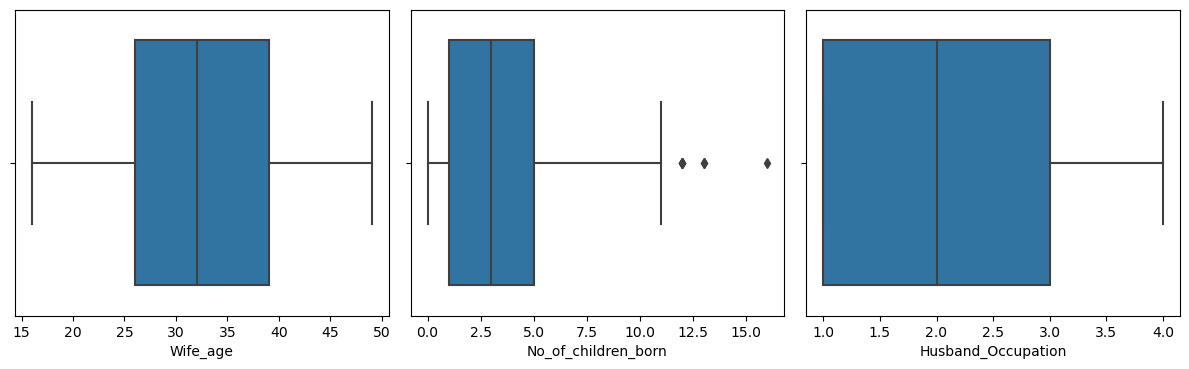

In [1216]:
plt.figure(figsize=(12,7))
for i in range(col_num.shape[1]):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=col_num,x=col_num.columns[i])
    plt.tight_layout()

In [1217]:
q1,q3=col_num.No_of_children_born.quantile([0.25,0.75])
IQR=q3-q1
UL=q3+(1.5*IQR)
LL=q1-(1.5*IQR)
print(UL,LL)

11.0 -5.0


8.0


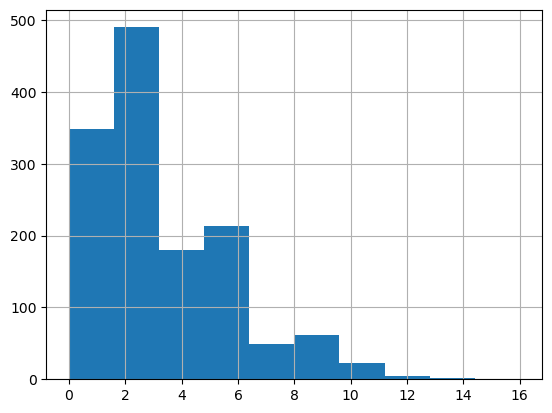

In [1218]:
print(col_num.No_of_children_born.quantile(0.95))
col_num.No_of_children_born.hist();

In [1219]:
col_num.No_of_children_born=np.where(col_num.No_of_children_born>UL,UL,col_num.No_of_children_born)
col_num.No_of_children_born=np.where(col_num.No_of_children_born<LL,LL,col_num.No_of_children_born)

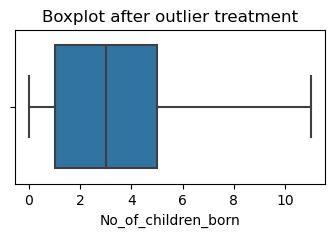

In [1220]:
plt.figure(figsize=(4,2))
sns.boxplot(data=col_num,x="No_of_children_born")
plt.title('Boxplot after outlier treatment');

In [1221]:
col_num.isnull().sum()

Wife_age               67
No_of_children_born    21
Husband_Occupation      0
dtype: int64

In [1222]:
col_num[col_num.Wife_age.isnull()].T

,1380,1381,1382,1383,1384,1385,1386,1388,1389,1390,...,1439,1441,1442,1443,1444,1445,1446,1448,1449,1450
Wife_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,4.0,4.0,7.0,2.0,3.0,1.0,5.0,2.0,4.0,5.0,...,5.0,1.0,3.0,0.0,2.0,3.0,3.0,5.0,1.0,4.0
Husband_Occupation,3.0,3.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,3.0,...,1.0,2.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0


In [1223]:
col_num['Wife_age']=col_num['Wife_age'].fillna(col_num['Wife_age'].mean().round())

In [1224]:
col_num.No_of_children_born=col_num.No_of_children_born.fillna(col_num.No_of_children_born.mean().round())

In [1225]:
col_num.isnull().sum()

Wife_age               0
No_of_children_born    0
Husband_Occupation     0
dtype: int64

In [1226]:
col_num.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation'], dtype='object')

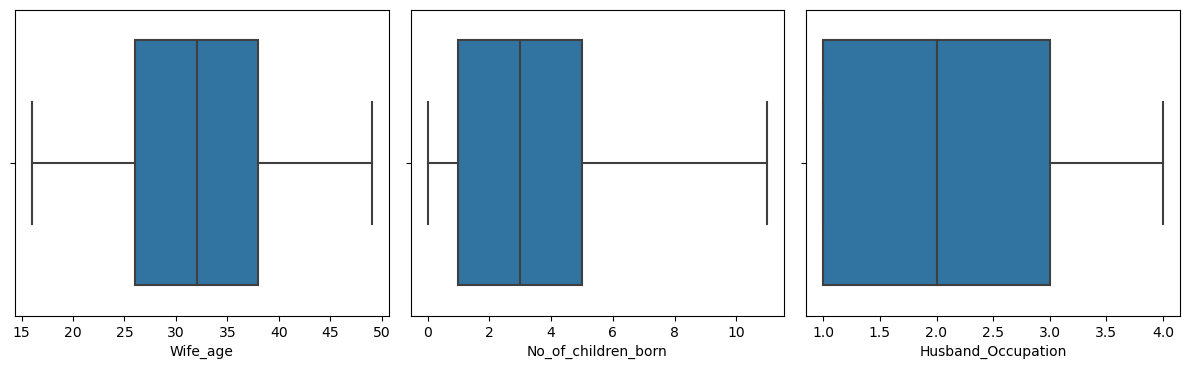

In [1227]:
plt.figure(figsize=(12,7))
for i in range(col_num.shape[1]):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=col_num,x=col_num.columns[i])
    plt.tight_layout()

In [1261]:
col_num.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1393.000000,1393.000000,1393.000000
mean,32.578607,3.277100,2.174444
std,8.087864,2.345673,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,11.000000,4.000000


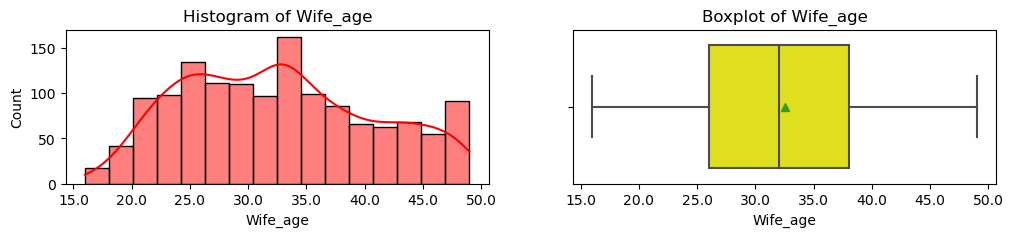

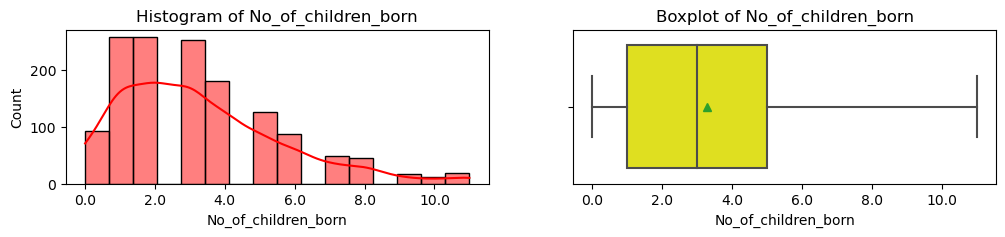

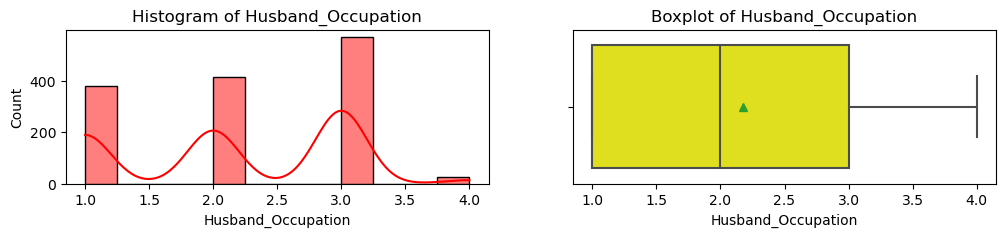

In [1229]:
for i in range(col_num.shape[1]):
    fig,axes=plt.subplots(1,2,figsize=(12,2))
    a=sns.histplot(data=col_num,x=col_num.columns[i],kde=True,color='red',ax=axes[0])
    a.set_xticklabels(a.get_xticks())
    a.set_title('Histogram of {}'.format(col_num.columns[i]))
    b=sns.boxplot(data=col_num,x=col_num.columns[i],showmeans=True,color='yellow',ax=axes[1])
    b.set_xticklabels(b.get_xticks())
    b.set_title('Boxplot of {}'.format(col_num.columns[i]))
    col_num[col_num.columns[i]].describe()

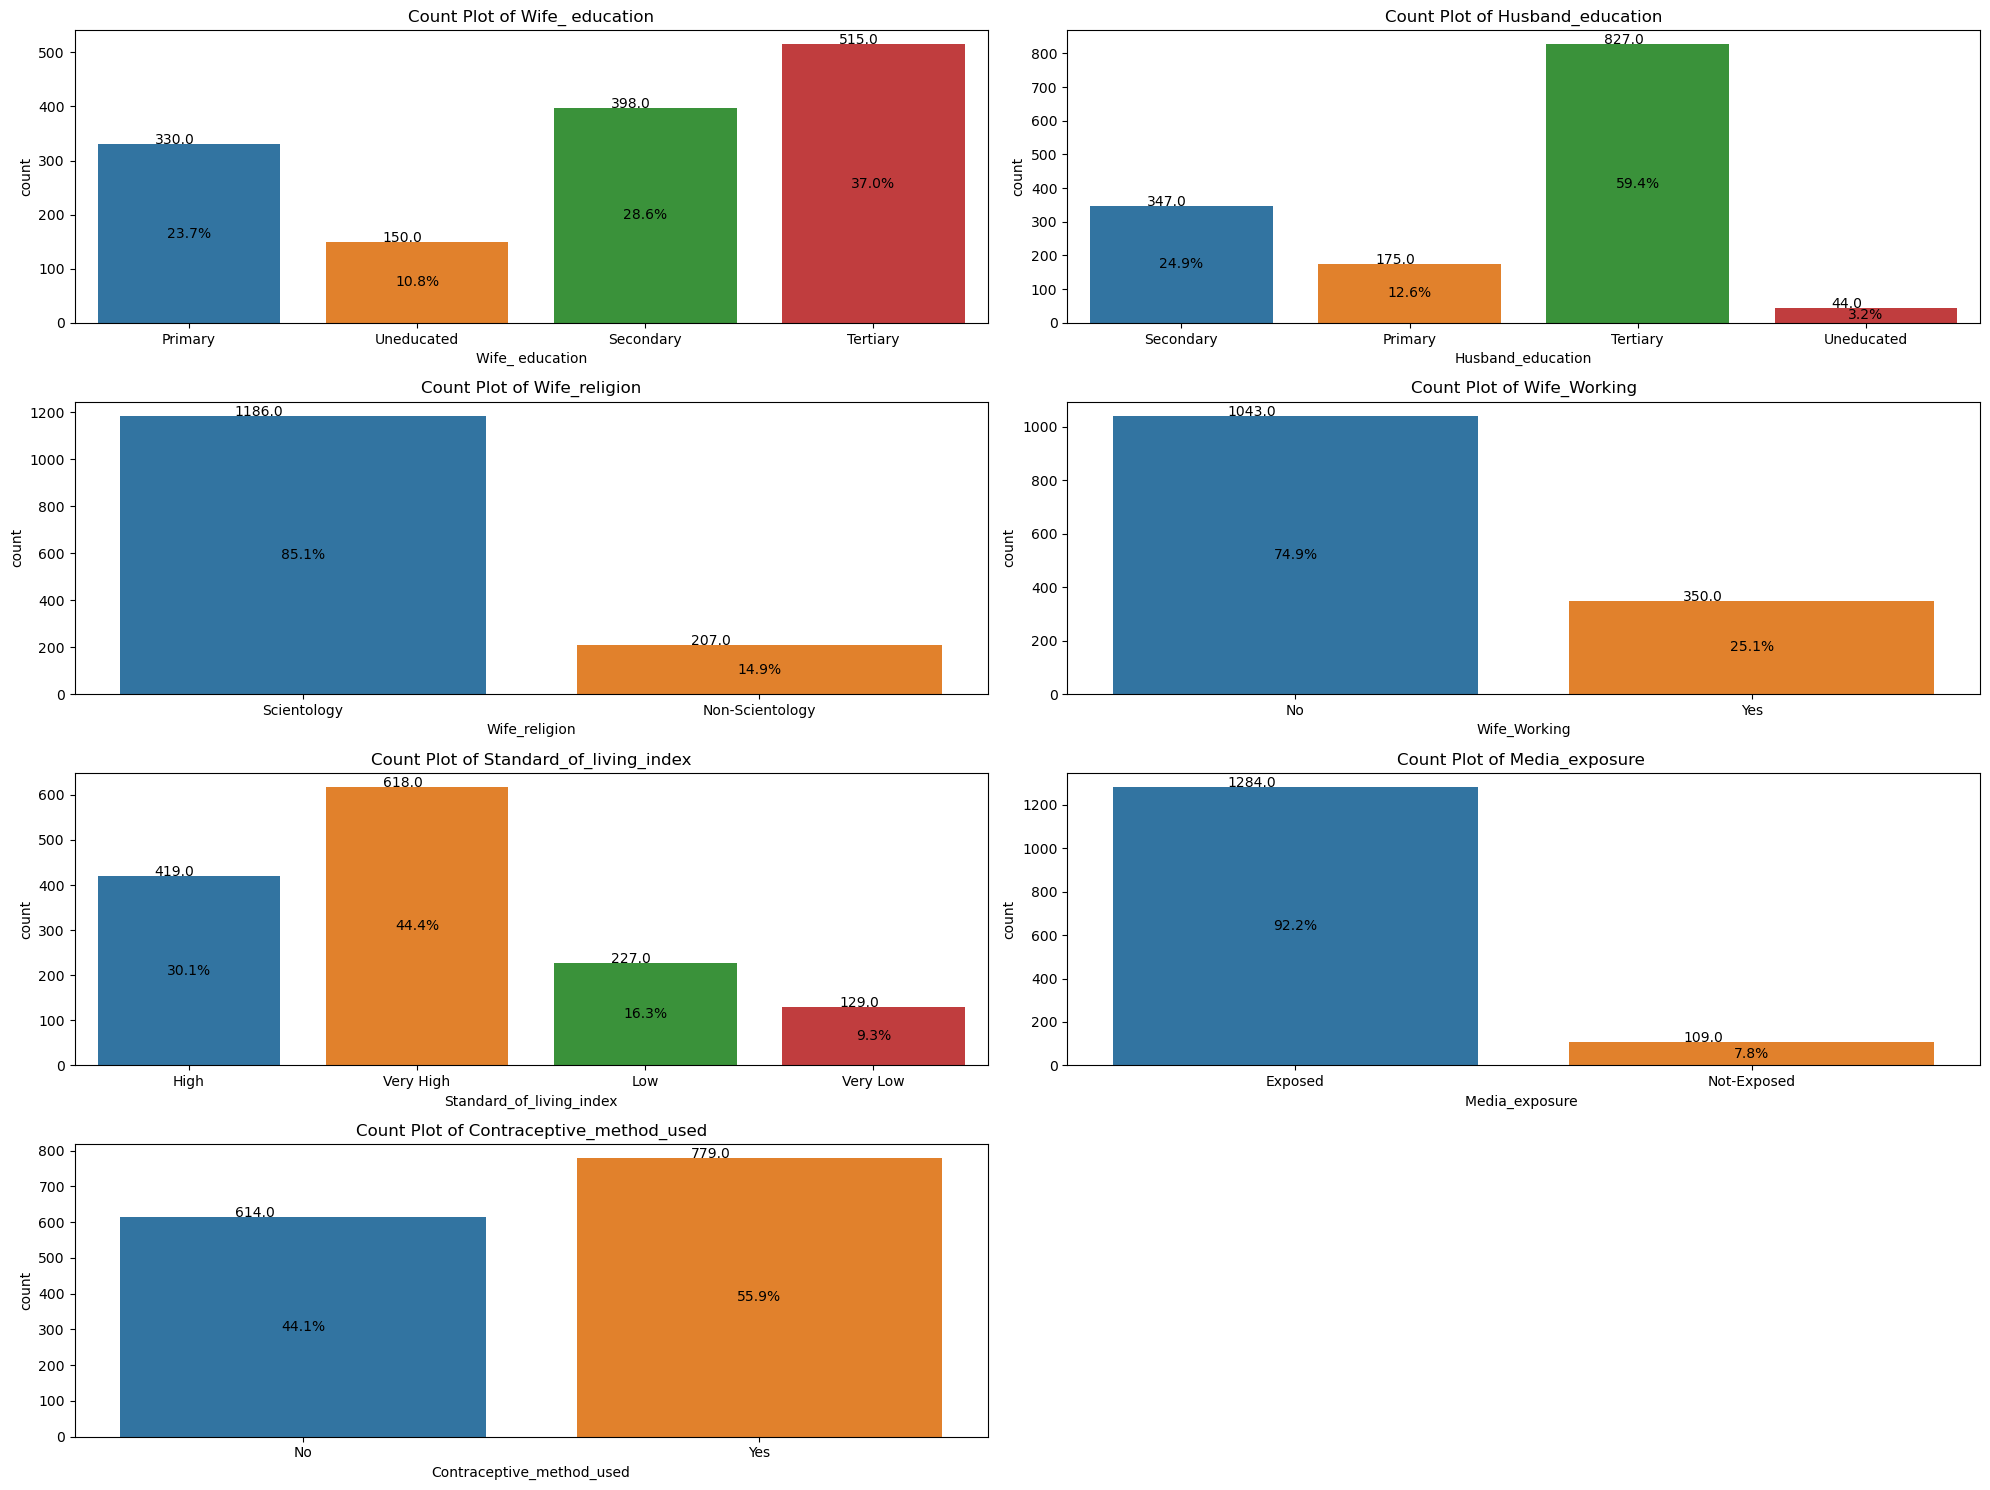

In [1230]:
plt.figure(figsize=(20,15))
for i in range(len(col_cat.columns)):
    plt.subplot(4,2,i+1)
    ax=sns.countplot(data=col_cat,x=col_cat.columns[i])
    for c in ax.containers:
        labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
        ax.bar_label(c,labels=labels,label_type='center')
    for p in ax.patches:
        plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
        plt.tight_layout()
        plt.title('Count Plot of {}'.format(col_cat.columns[i]))
    plt.savefig('categorical datatypes.png')

In [1262]:
contracc=pd.concat([col_num,col_cat],axis=1)

In [1263]:
contracc.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education,Husband_education,Wife_religion,Wife_Working,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,3.0,2,Primary,Secondary,Scientology,No,High,Exposed,No
1,45.0,10.0,3,Uneducated,Secondary,Scientology,No,Very High,Exposed,No
2,43.0,7.0,3,Primary,Secondary,Scientology,No,Very High,Exposed,No
3,42.0,9.0,3,Secondary,Primary,Scientology,No,High,Exposed,No
4,36.0,8.0,3,Secondary,Secondary,Scientology,No,Low,Exposed,No


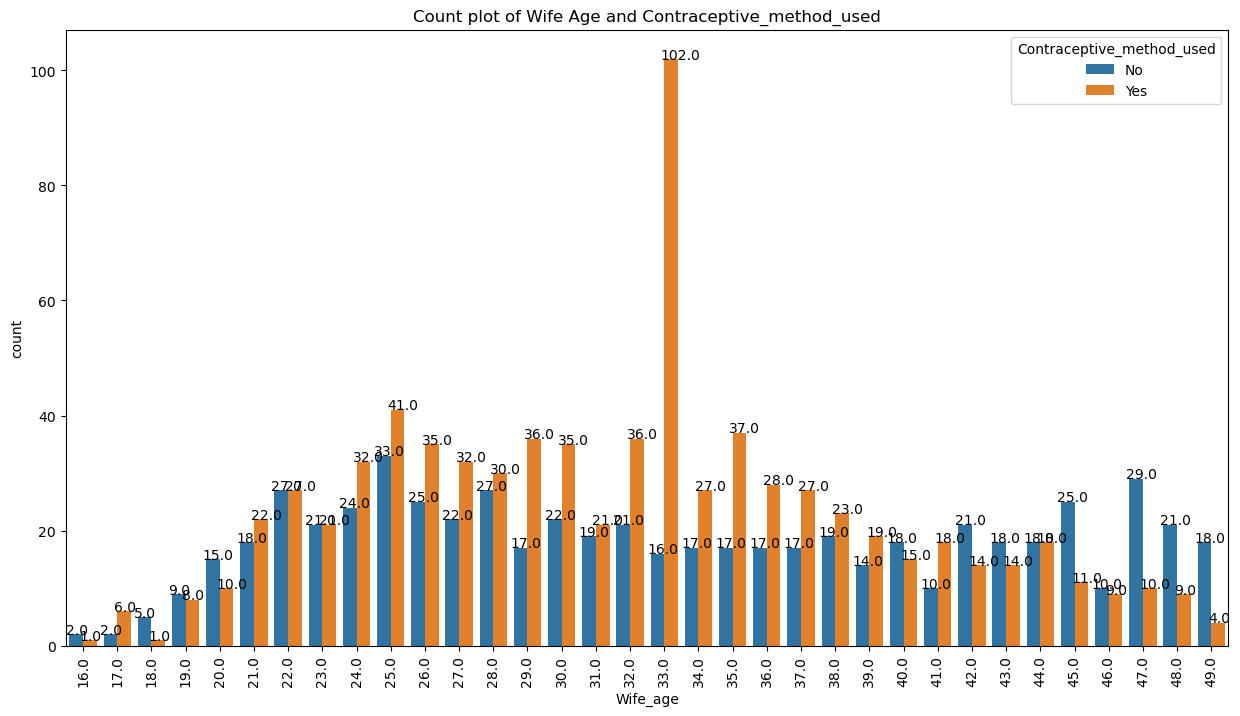

In [1232]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=contracc,x='Wife_age',hue='Contraceptive_method_used')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()-0.1,p.get_height()+0.01))
    plt.xticks(rotation=90);
    plt.title('Count plot of Wife Age and Contraceptive_method_used')
    plt.savefig('count plot wife age.png')


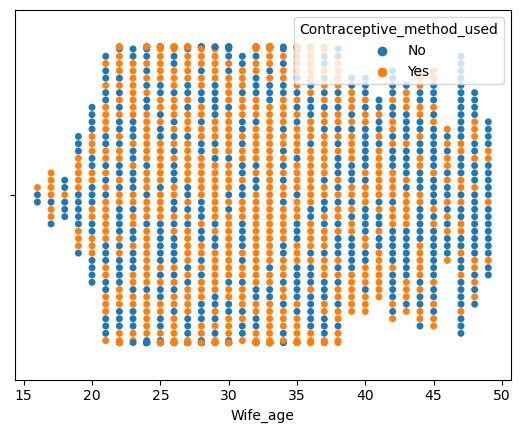

In [1233]:
sns.swarmplot(data=contracc,x='Wife_age',hue='Contraceptive_method_used');

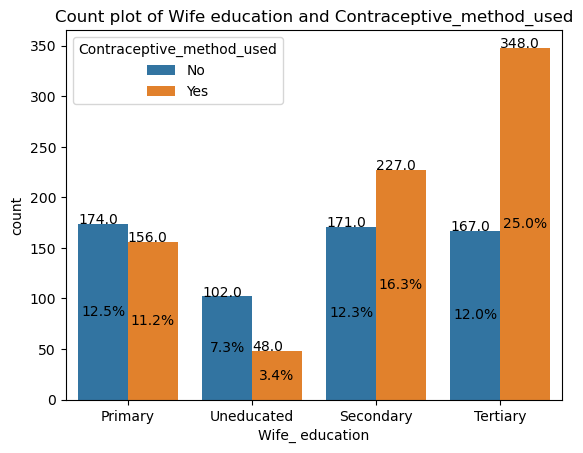

In [1234]:
ax=sns.countplot(contracc,x='Wife_ education',hue='Contraceptive_method_used')
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+0.01))
    plt.title('Count plot of Wife education and Contraceptive_method_used')

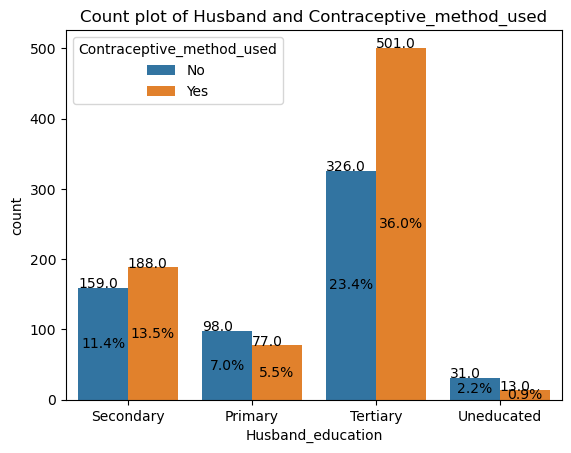

In [1235]:
ax=sns.countplot(contracc,x='Husband_education',hue='Contraceptive_method_used')
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+0.01))
    plt.title('Count plot of Husband and Contraceptive_method_used')

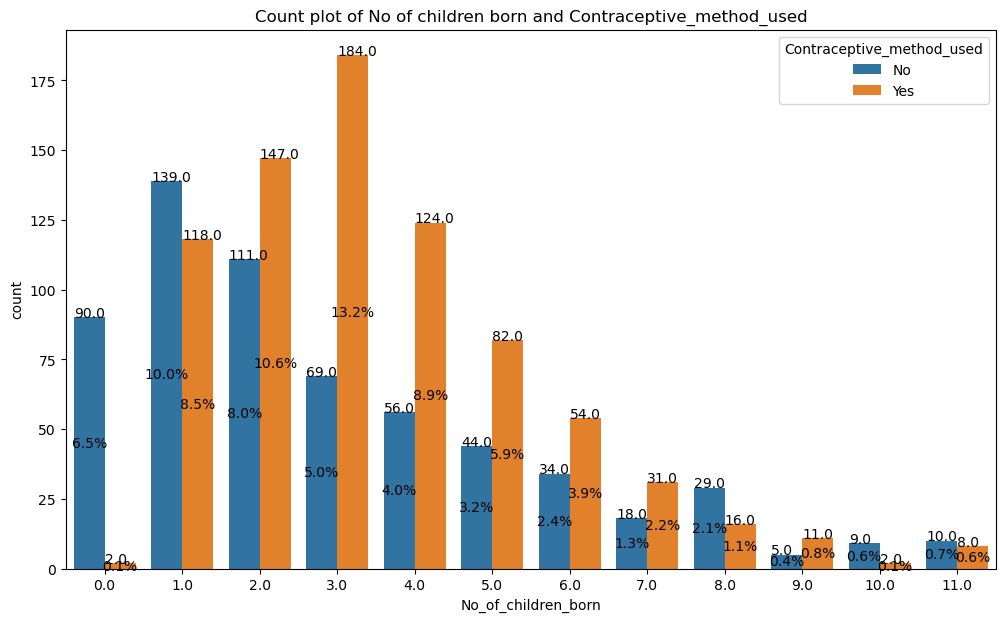

In [1236]:
plt.figure(figsize=(12,7))
ax=sns.countplot(contracc,x='No_of_children_born',hue='Contraceptive_method_used')
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+0.01))
    plt.title('Count plot of No of children born and Contraceptive_method_used')

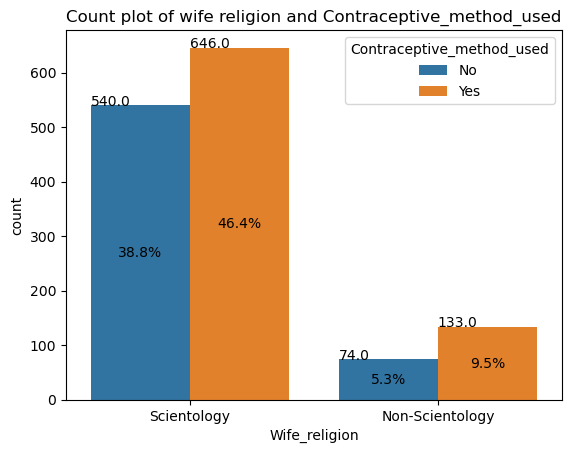

In [1237]:
ax= sns.countplot(contracc,x='Wife_religion',hue='Contraceptive_method_used');
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+0.01))
    plt.title('Count plot of wife religion and Contraceptive_method_used')

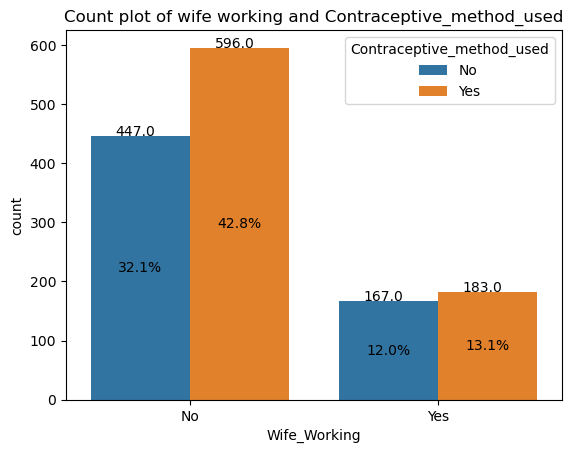

In [1238]:
ax=sns.countplot(contracc,x='Wife_Working',hue='Contraceptive_method_used');
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+0.01))
    plt.title('Count plot of wife working and Contraceptive_method_used')

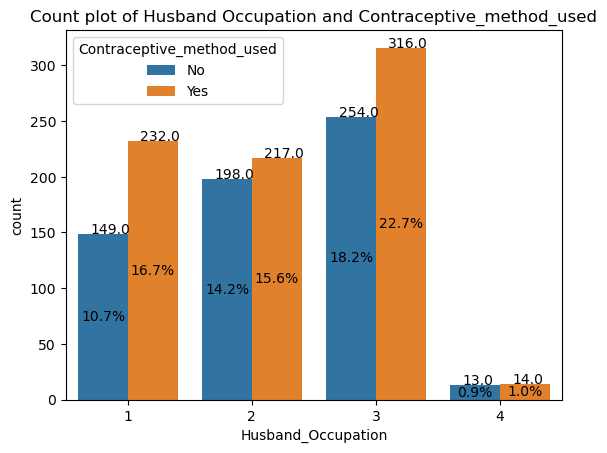

In [1239]:
ax=sns.countplot(contracc,x='Husband_Occupation',hue='Contraceptive_method_used');
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+0.01))
    plt.title('Count plot of Husband Occupation and Contraceptive_method_used')

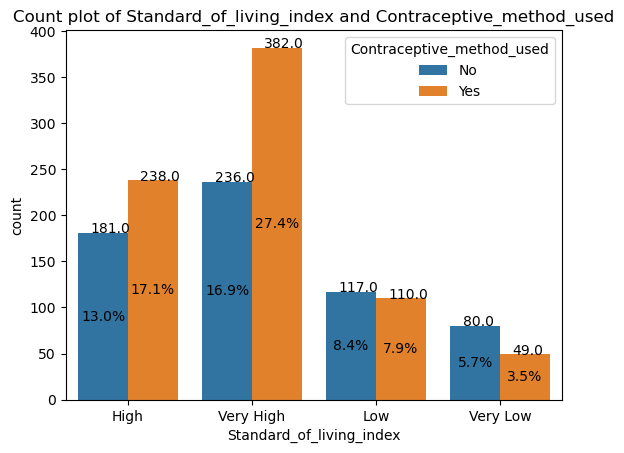

In [1240]:
ax=sns.countplot(contracc,x='Standard_of_living_index',hue='Contraceptive_method_used');
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+0.01))
    plt.title('Count plot of Standard_of_living_index and Contraceptive_method_used')

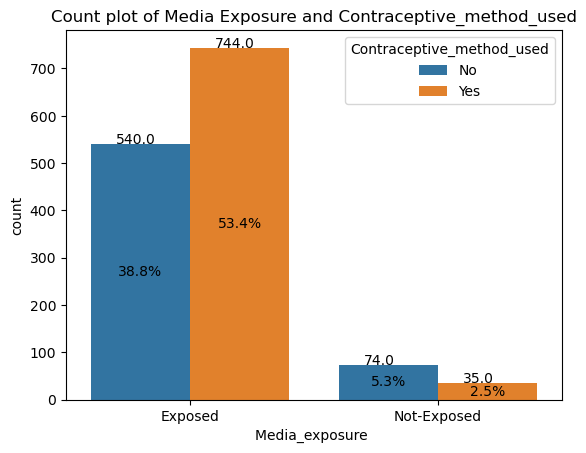

In [1267]:
ax=sns.countplot(contracc,x='Media_exposure ',hue='Contraceptive_method_used');
for c in ax.containers:
    labels=[f'{h/col_cat[col_cat.columns[i]].count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+0.01))
    plt.title('Count plot of Media Exposure and Contraceptive_method_used')

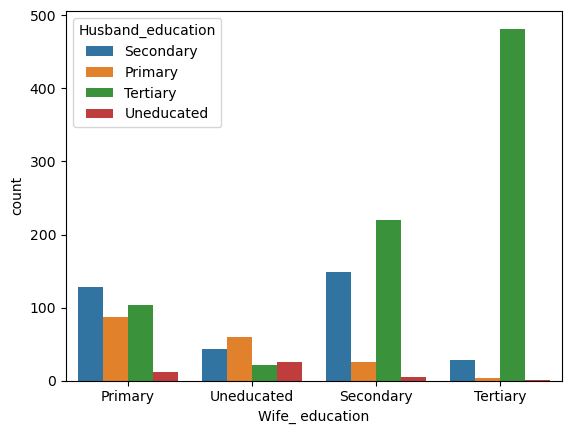

In [1242]:
sns.countplot(contra,x='Wife_ education',hue='Husband_education');

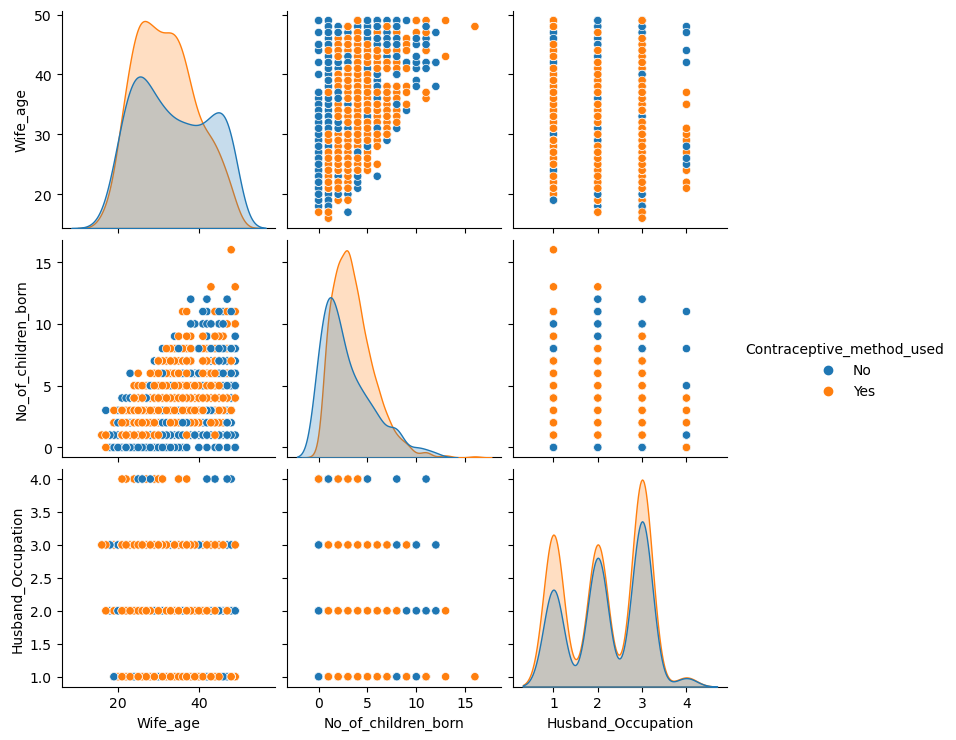

In [502]:

sns.pairplot(contra,diag_kind='kde',hue='Contraceptive_method_used');
plt.savefig('pairplots.png')

<Axes: >

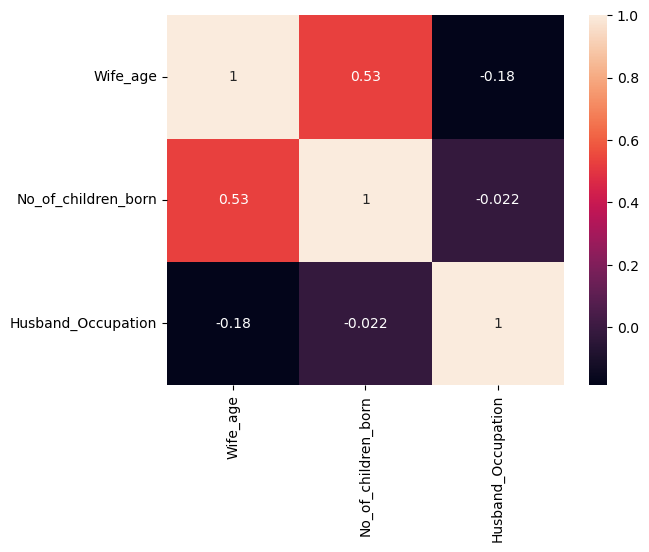

In [1243]:
sns.heatmap(contracc.corr(),annot=True)

In [1274]:
contra.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

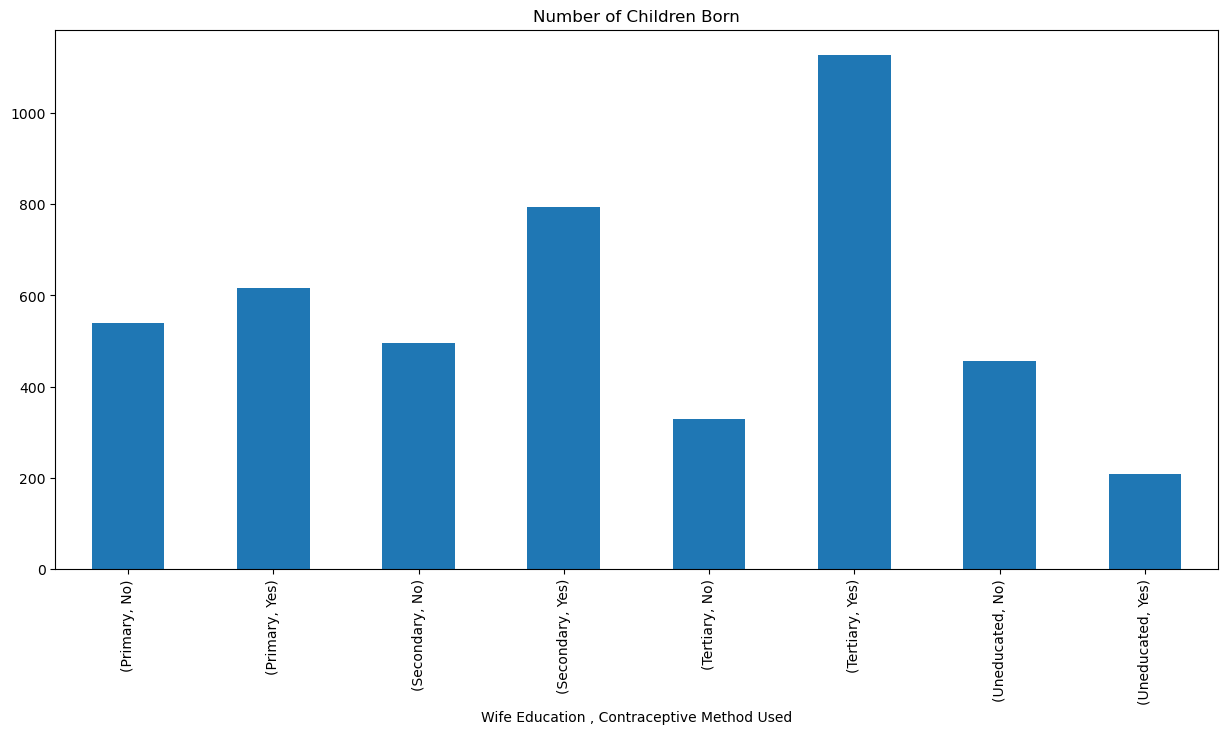

In [1283]:
contracc.groupby(['Wife_ education','Contraceptive_method_used']).sum()['No_of_children_born'].plot(kind='bar',figsize=(15,7))
plt.xlabel('Wife Education , Contraceptive Method Used')
plt.title('Number of Children Born');
plt.savefig('wife_eduaction.png')

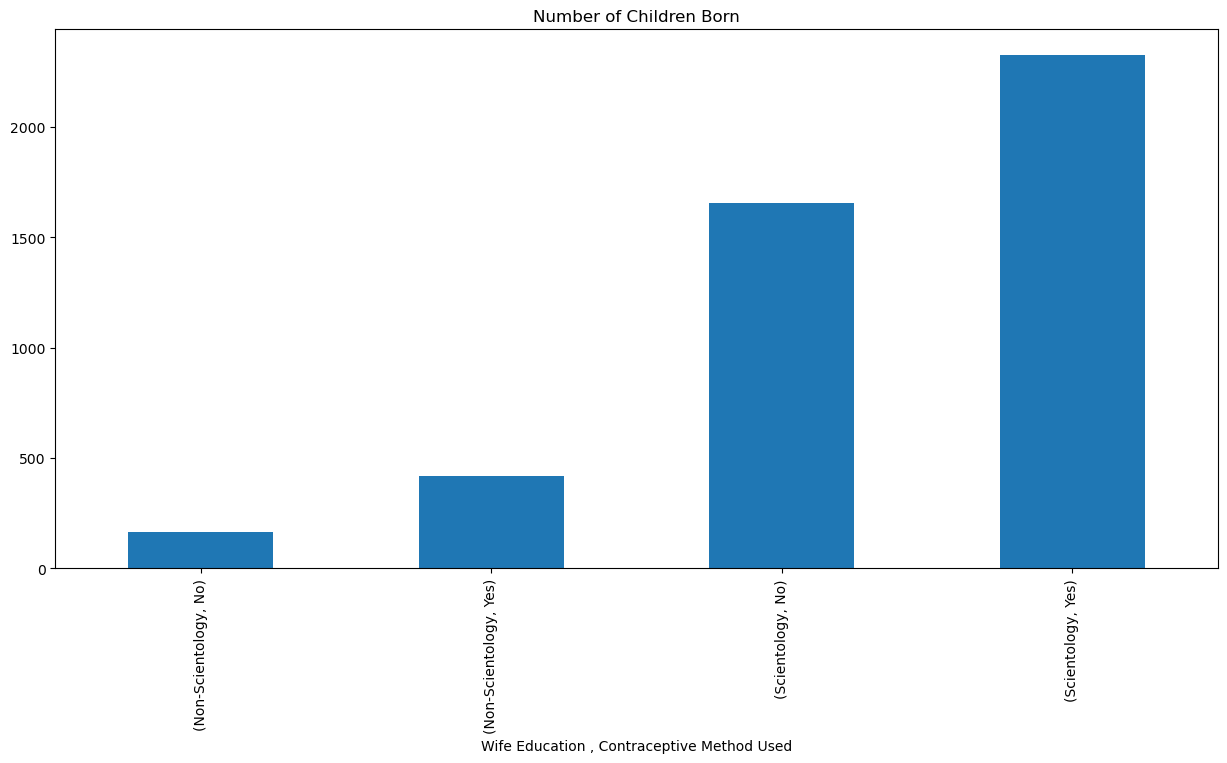

In [1286]:
contracc.groupby(['Wife_religion','Contraceptive_method_used']).sum()['No_of_children_born'].plot(kind='bar',figsize=(15,7))
plt.xlabel('Wife Education , Contraceptive Method Used')
plt.title('Number of Children Born');
plt.savefig('wife_eduaction.png')

In [ ]:
pd.crosstab(contac['Wife_ education'])

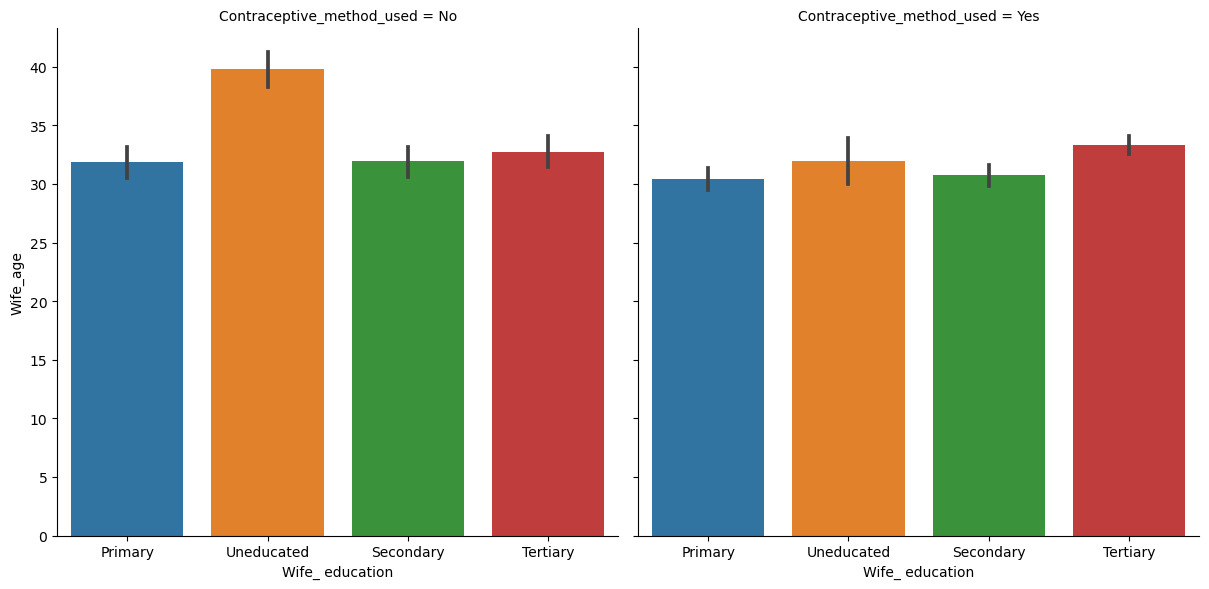

In [1270]:
sns.catplot(data=contracc,x='Wife_ education',y='Wife_age',col='Contraceptive_method_used',col_wrap=3,kind='bar',height=6)
plt.tight_layout()

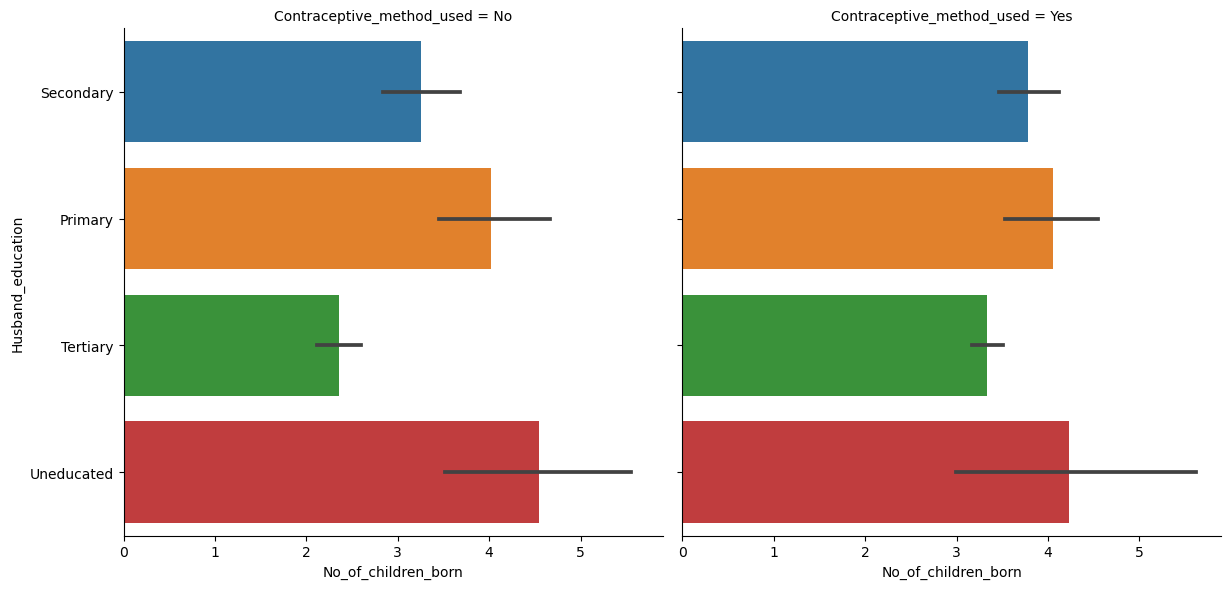

In [1271]:
sns.catplot(data=contracc,x='No_of_children_born',y='Husband_education',col='Contraceptive_method_used',col_wrap=3,kind='bar',height=6)
plt.tight_layout()

<Axes: xlabel='Wife_ education', ylabel='Wife_age'>

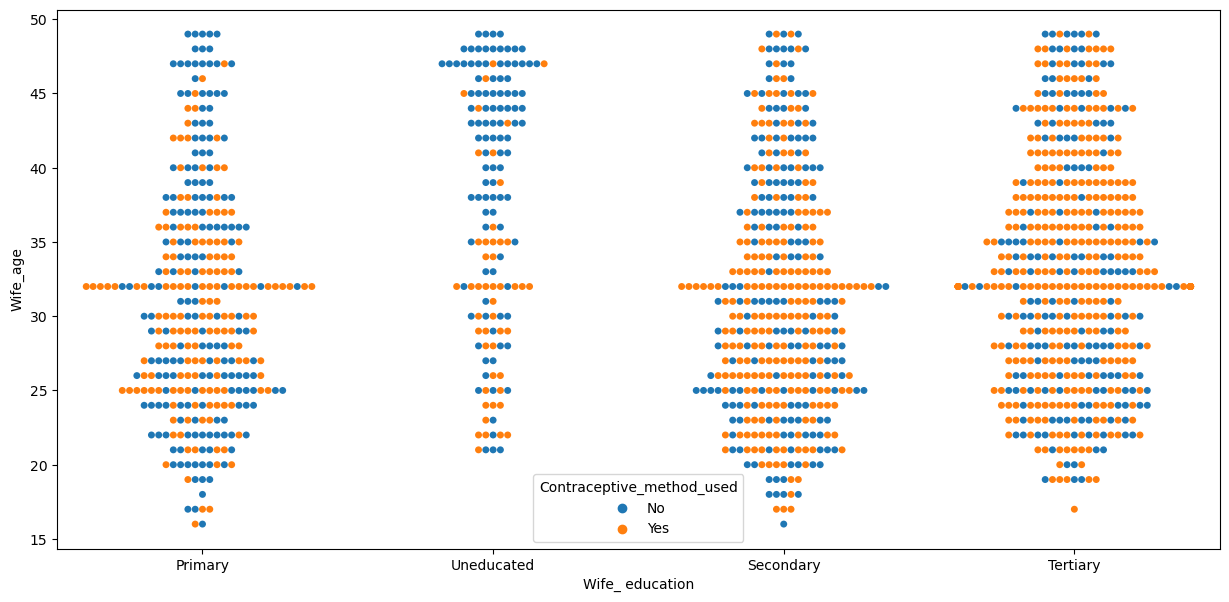

In [251]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=contra,x='Wife_ education',y='Wife_age',hue='Contraceptive_method_used')

<Axes: xlabel='Wife_ education', ylabel='Wife_age'>

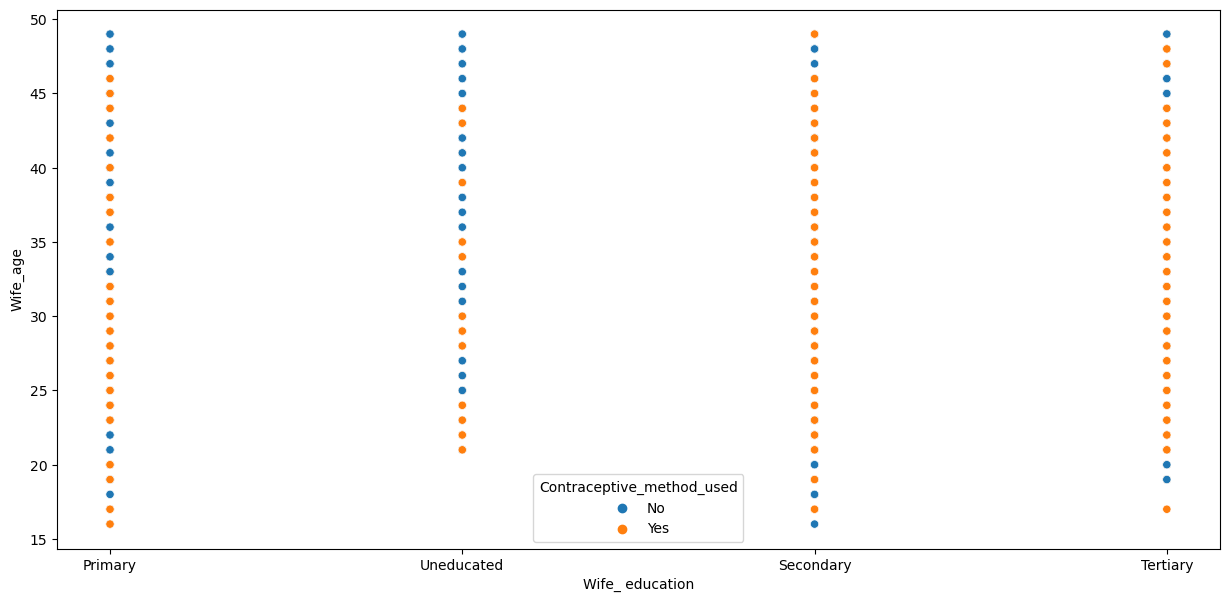

In [1190]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=contra,x='Wife_ education',y='Wife_age',hue='Contraceptive_method_used')

<Axes: xlabel='Husband_education', ylabel='Wife_age'>

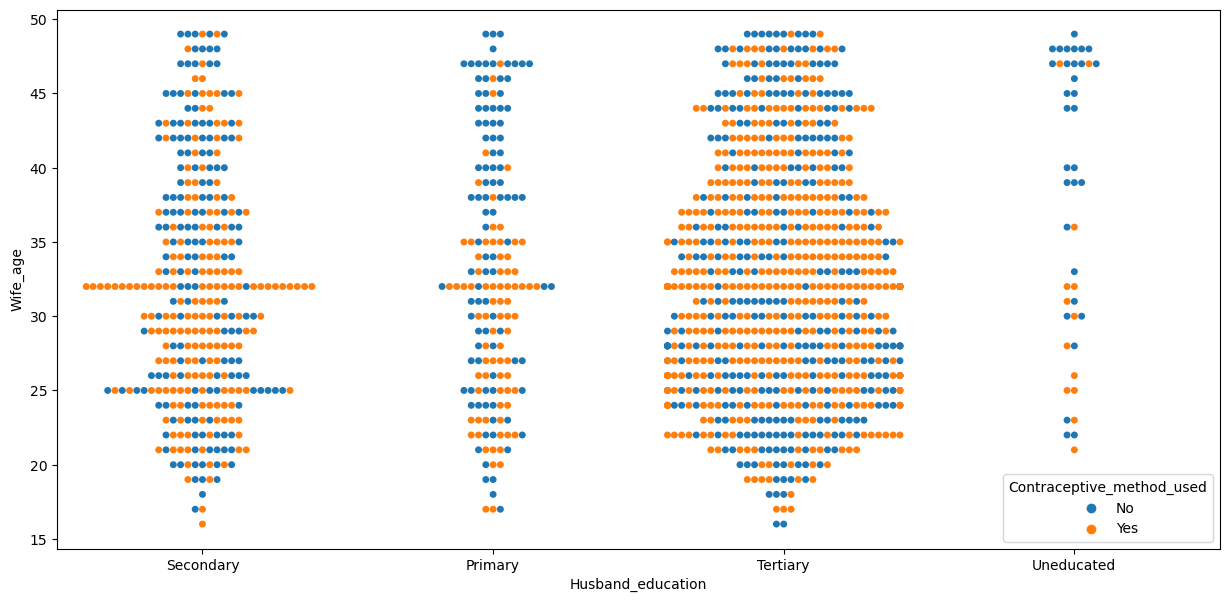

In [276]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=contra,x='Husband_education',y='Wife_age',hue='Contraceptive_method_used')

<Axes: xlabel='No_of_children_born', ylabel='Wife_age'>

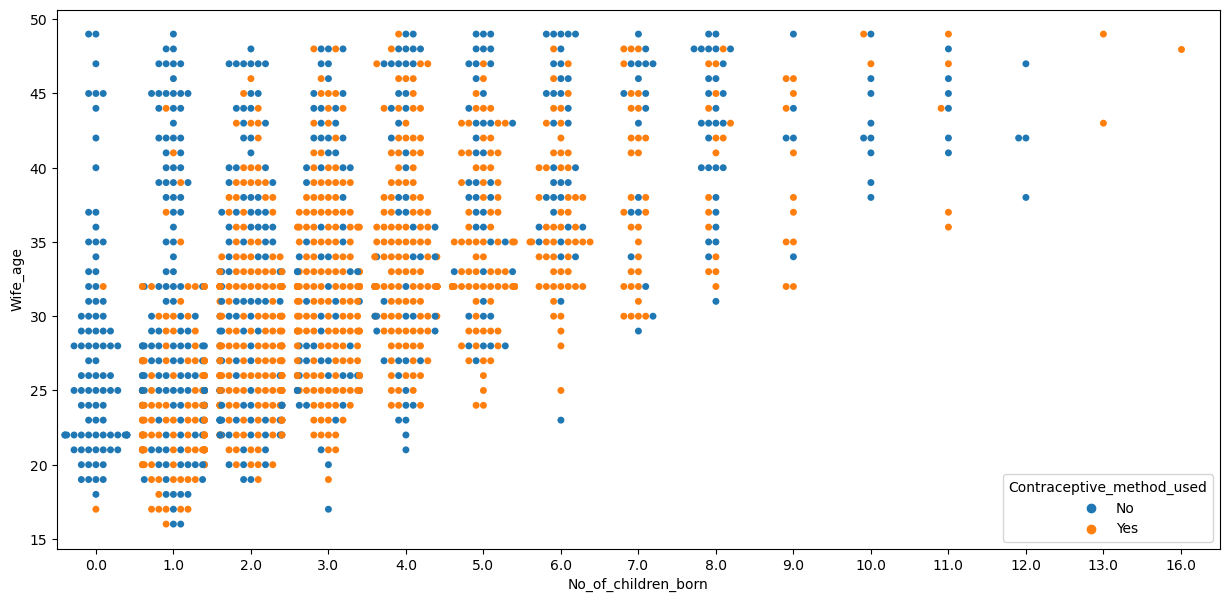

In [253]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=contra,x='No_of_children_born',y='Wife_age',hue='Contraceptive_method_used')

In [1287]:
contracc.columns
contracc.rename(columns={'Wife_ education':'wife_education','Media_exposure ':'media_exposure','Standard_of_living_index':'standard_of_living'},inplace=True)

In [1288]:
print('categories in Wife Education','\n',contracc.wife_education.value_counts())
contracc.wife_education=contracc.wife_education.replace(['Tertiary','Secondary','Primary','Uneducated'],[4,3,2,1])
print('Ordinal categories after Encoding \n',contracc.wife_education.value_counts())

categories in Wife Education 
 Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: wife_education, dtype: int64
Ordinal categories after Encoding 
 4    515
3    398
2    330
1    150
Name: wife_education, dtype: int64


In [1289]:
print('categories in Husband Education','\n',contracc.Husband_education.value_counts())
contracc.Husband_education=contracc.Husband_education.replace(['Tertiary','Secondary','Primary','Uneducated'],[4,3,2,1])
print('\n','Ordinal categories after Encoding \n',contracc.Husband_education.value_counts())

categories in Husband Education 
 Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64

 Ordinal categories after Encoding 
 4    827
3    347
2    175
1     44
Name: Husband_education, dtype: int64


In [1290]:
print('categories in Standard of Living Index','\n',contracc.standard_of_living.value_counts())
contracc.standard_of_living=contracc.standard_of_living.replace(['Very High','High','Low','Very Low'],[4,3,2,1])
print('\n','Ordinal categories after Encoding \n',contracc.standard_of_living.value_counts())

categories in Standard of Living Index 
 Very High    618
High         419
Low          227
Very Low     129
Name: standard_of_living, dtype: int64

 Ordinal categories after Encoding 
 4    618
3    419
2    227
1    129
Name: standard_of_living, dtype: int64


In [1291]:
for i in col_cat.columns:
    print(i.upper(),col_cat[i].nunique())
    print(col_cat[i].value_counts(),'\n')

WIFE_ EDUCATION 4
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64 

HUSBAND_EDUCATION 4
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64 

WIFE_RELIGION 2
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64 

WIFE_WORKING 2
No     1043
Yes     350
Name: Wife_Working, dtype: int64 

STANDARD_OF_LIVING_INDEX 4
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64 

MEDIA_EXPOSURE  2
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64 

CONTRACEPTIVE_METHOD_USED 2
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64 



In [1292]:
# let get the dummies for our binary columns
contracc=pd.get_dummies(contracc,columns=['Wife_religion','Wife_Working','media_exposure'],drop_first=True,dtype='int')

In [1293]:
contracc.head()

,Wife_age,No_of_children_born,Husband_Occupation,wife_education,Husband_education,standard_of_living,Contraceptive_method_used,Wife_religion_Scientology,Wife_Working_Yes,media_exposure_Not-Exposed
0,24.0,3.0,2,2,3,3,No,1,0,0
1,45.0,10.0,3,1,3,4,No,1,0,0
2,43.0,7.0,3,2,3,4,No,1,0,0
3,42.0,9.0,3,3,2,3,No,1,0,0
4,36.0,8.0,3,3,3,2,No,1,0,0


In [1294]:
print('Number of each categories in Contraceptive Method Used : - \n',contracc.Contraceptive_method_used.value_counts())
contracc.Contraceptive_method_used=contracc.Contraceptive_method_used.replace(['Yes','No'],[1,0])
print('Encoded categories: - \n',contracc.Contraceptive_method_used.value_counts())

Number of each categories in Contraceptive Method Used : - 
 Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64
Encoded categories: - 
 1    779
0    614
Name: Contraceptive_method_used, dtype: int64


In [1295]:
contracc.tail().T

,1468,1469,1470,1471,1472
Wife_age,33.0,33.0,39.0,33.0,17.0
No_of_children_born,3.0,3.0,3.0,3.0,1.0
Husband_Occupation,2.0,1.0,1.0,2.0,2.0
wife_education,4.0,4.0,3.0,3.0,3.0
Husband_education,4.0,4.0,3.0,3.0,3.0
standard_of_living,4.0,4.0,4.0,2.0,4.0
Contraceptive_method_used,1.0,1.0,1.0,1.0,1.0
Wife_religion_Scientology,1.0,1.0,1.0,1.0,1.0
Wife_Working_Yes,1.0,0.0,1.0,1.0,0.0
media_exposure_Not-Exposed,0.0,0.0,0.0,0.0,0.0


In [1296]:
contracc.head().T

,0,1,2,3,4
Wife_age,24.0,45.0,43.0,42.0,36.0
No_of_children_born,3.0,10.0,7.0,9.0,8.0
Husband_Occupation,2.0,3.0,3.0,3.0,3.0
wife_education,2.0,1.0,2.0,3.0,3.0
Husband_education,3.0,3.0,3.0,2.0,3.0
standard_of_living,3.0,4.0,4.0,3.0,2.0
Contraceptive_method_used,0.0,0.0,0.0,0.0,0.0
Wife_religion_Scientology,1.0,1.0,1.0,1.0,1.0
Wife_Working_Yes,0.0,0.0,0.0,0.0,0.0
media_exposure_Not-Exposed,0.0,0.0,0.0,0.0,0.0


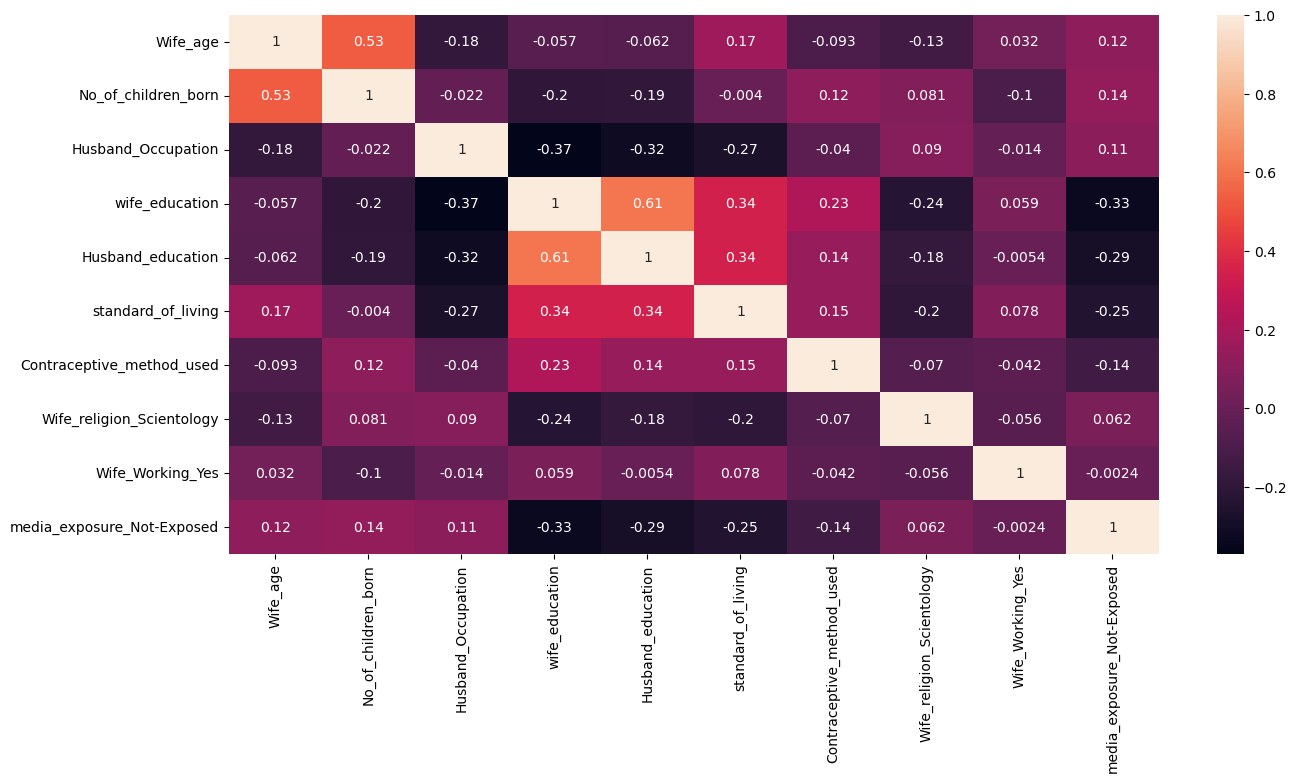

In [1299]:
plt.figure(figsize=(15,7))
sns.heatmap(contracc.corr(),annot=True)
plt.savefig('Heat map encoded.png')

In [1071]:
x=contracc.drop('Contraceptive_method_used',axis=1)
y=contracc.Contraceptive_method_used

In [1300]:
print('VIF of the independent Variables')
vif_series10=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print(round(vif_series10,3))

VIF of the independent Variables
Wife_age                      19.915
No_of_children_born            4.496
Husband_Occupation             6.110
wife_education                15.427
Husband_education             25.465
standard_of_living            12.789
Wife_religion_Scientology      5.988
Wife_Working_Yes               1.335
media_exposure_Not-Exposed     1.226
dtype: float64


In [1072]:
from sklearn.model_selection import train_test_split

In [1073]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [1074]:
from sklearn.linear_model import LogisticRegression

In [1075]:
log_model=LogisticRegression(random_state=1)
log_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [1076]:
from sklearn.metrics import confusion_matrix,classification_report

Classification Report performing simple Logistic Regression on Train Data 
               precision    recall  f1-score   support

           0       0.66      0.52      0.58       430
           1       0.68      0.79      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.65      0.65       975
weighted avg       0.67      0.67      0.66       975



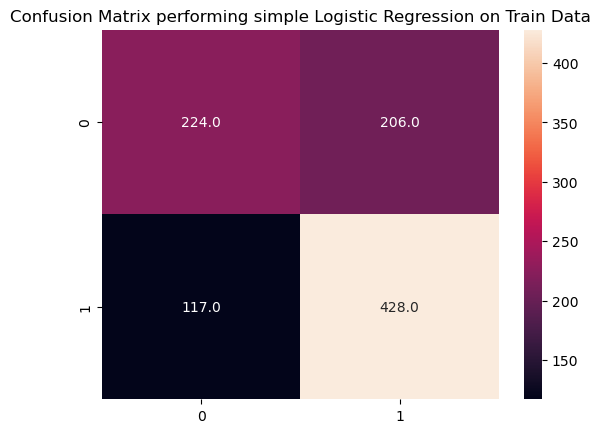

In [1077]:
y_predicted_train=log_model.predict(x_train)
y_predicted_test=log_model.predict(x_test)
sns.heatmap(confusion_matrix(y_train,y_predicted_train),annot=True, fmt='.1f')
plt.title('Confusion Matrix performing simple Logistic Regression on Train Data');
print('Classification Report performing simple Logistic Regression on Train Data \n',classification_report(y_train,y_predicted_train))

Classification Report performing simple Logistic Regression on Test Data 
               precision    recall  f1-score   support

           0       0.62      0.46      0.53       184
           1       0.65      0.78      0.71       234

    accuracy                           0.64       418
   macro avg       0.64      0.62      0.62       418
weighted avg       0.64      0.64      0.63       418



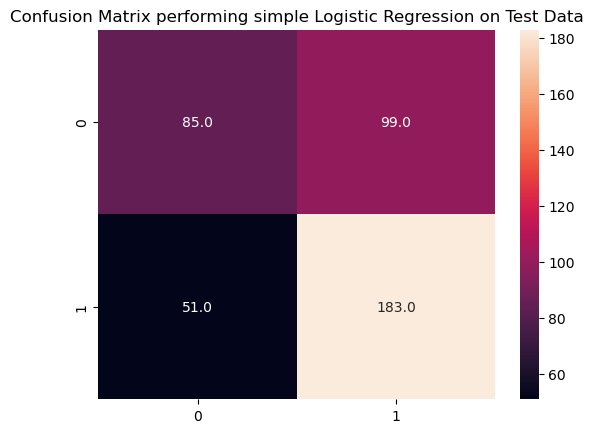

In [1078]:
sns.heatmap(confusion_matrix(y_test,y_predicted_test),annot=True, fmt='.1f')
plt.title('Confusion Matrix performing simple Logistic Regression on Test Data');
print('Classification Report performing simple Logistic Regression on Test Data \n',classification_report(y_test,y_predicted_test))

In [1079]:
log_model.score(x_train,y_train)

0.6687179487179488

In [1080]:
log_model.score(x_test,y_test)

0.6411483253588517

In [1081]:
from sklearn.model_selection import GridSearchCV

In [1082]:
grid={'penalty':['l1','l2','None'],'solver':['lbfgs', 'liblinear', 'newton-cg','saga'],
      'tol':[0.0001,0.00001],'max_iter':[100,200,300,500,1000]}

In [1083]:
grid_model=GridSearchCV(estimator=log_model,param_grid=grid,scoring='f1',n_jobs=-1,cv=5,verbose=True)

In [1084]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=True)

In [1085]:
print('The best paarmeter after applying GridSearchCV to our model \n',grid_model.best_estimator_)

The best paarmeter after applying GridSearchCV to our model 
 LogisticRegression(max_iter=300, random_state=1, solver='saga')


In [1086]:
grid_model.best_params_

{'max_iter': 300, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}

In [1087]:
best_model=LogisticRegression(max_iter= 300, penalty= 'l2', solver= 'saga', tol= 0.0001,random_state=1)

In [1088]:
best_model.fit(x_train,y_train)

LogisticRegression(max_iter=300, random_state=1, solver='saga')

In [1089]:
best_model.score(x_train,y_train)

0.6697435897435897

In [1090]:
best_model.score(x_test,y_test)

0.645933014354067

In [1091]:
y_train_pred=best_model.predict(x_train)
y_test_pred=best_model.predict(x_test)

In [1092]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

Logistic Regression Classification Report(with GridSearchCV) on Train Data 
               precision    recall  f1-score   support

           0       0.66      0.52      0.58       430
           1       0.68      0.79      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.65      0.65       975
weighted avg       0.67      0.67      0.66       975



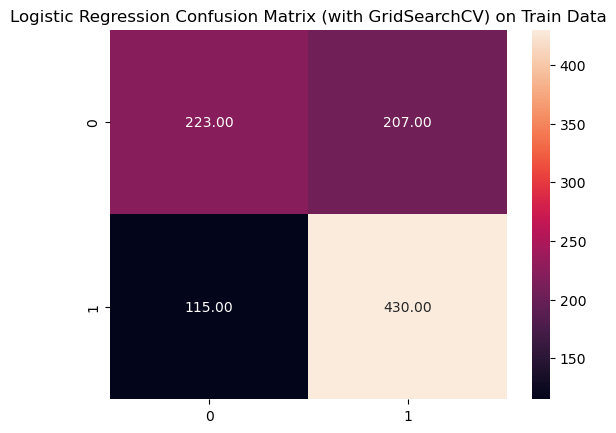

In [1093]:
# for train data
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.2f')
plt.title('Logistic Regression Confusion Matrix (with GridSearchCV) on Train Data')
print('Logistic Regression Classification Report(with GridSearchCV) on Train Data \n',classification_report(y_train,y_train_pred))



Logistic Regression Classification Report(with GridSearchCV) on Test Data  
               precision    recall  f1-score   support

           0       0.64      0.46      0.53       184
           1       0.65      0.79      0.72       234

    accuracy                           0.65       418
   macro avg       0.64      0.63      0.62       418
weighted avg       0.64      0.65      0.63       418



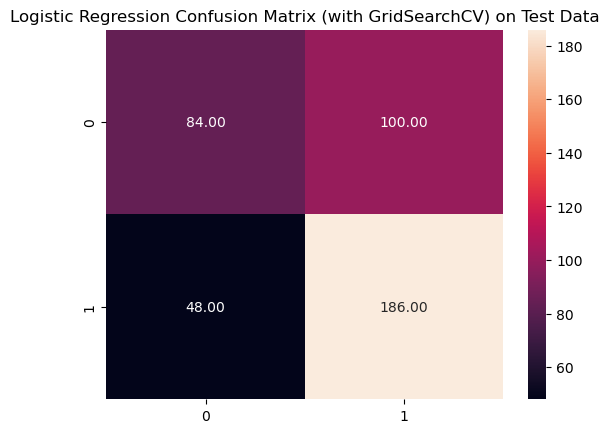

In [1094]:
# for test data

sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='.2f')
plt.title('Logistic Regression Confusion Matrix (with GridSearchCV) on Test Data')
print('Logistic Regression Classification Report(with GridSearchCV) on Test Data  \n',classification_report(y_test,y_test_pred))


In [1095]:
auc(train_fpr,train_tpr)
auc(test_fpr,test_tpr)

0.655437105165366

Logistic Regression Model ROC AUC Score of Train Data = 0.654


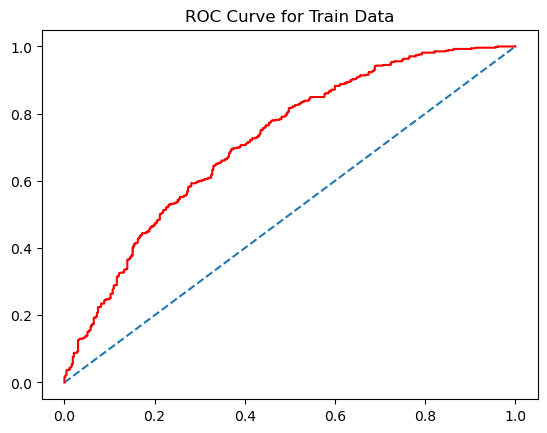

In [1096]:
# roc curve for train data
prob=best_model.predict_proba(x_train)
prob_train=prob[:,1]
print('Logistic Regression Model ROC AUC Score of Train Data =',roc_auc_score(y_train,y_train_pred).round(3))
train_fpr, train_tpr, train_thresholds=roc_curve(y_train,prob_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr,marker=',',color='r')
plt.title('ROC Curve for Train Data');

418

In [1111]:
df_prob=pd.DataFrame(data=prob,columns=['0-No','1-Yes'],index=range(0,975))
df_prob.T

,0,1,2,3,4,5,6,7,8,9,...,965,966,967,968,969,970,971,972,973,974
0-No,0.726992,0.190232,0.190744,0.415129,0.709844,0.478782,0.480257,0.691034,0.162164,0.309134,...,0.527662,0.411215,0.268884,0.676126,0.183435,0.552123,0.587915,0.398003,0.388753,0.235593
1-Yes,0.273008,0.809768,0.809256,0.584871,0.290156,0.521218,0.519743,0.308966,0.837836,0.690866,...,0.472338,0.588785,0.731116,0.323874,0.816565,0.447877,0.412085,0.601997,0.611247,0.764407


Logistic Regression Model ROC AUC Score of Test Data = 0.626


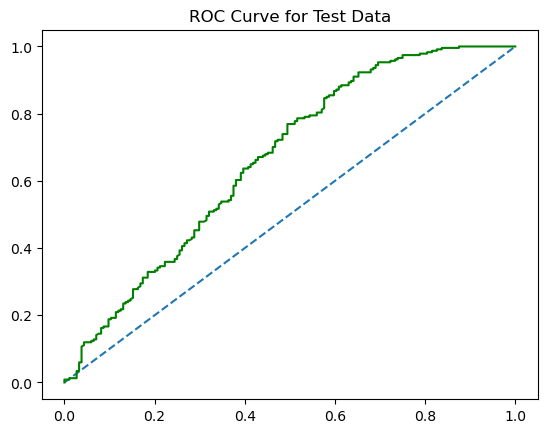

In [1112]:
# roc curve for test data
prob=best_model.predict_proba(x_test)
prob_test=prob[:,1]
print('Logistic Regression Model ROC AUC Score of Test Data =',roc_auc_score(y_test,y_test_pred).round(3))
test_fpr, test_tpr, test_thresholds=roc_curve(y_test,prob_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr,color='g')
plt.title('ROC Curve for Test Data');

In [1115]:
df_prob=pd.DataFrame(data=prob,columns=['0-No','1-Yes'],index=range(0,418))
df_prob.T

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0-No,0.274183,0.596586,0.33523,0.286708,0.235427,0.2778,0.285201,0.285231,0.515282,0.240069,...,0.613029,0.737835,0.174687,0.475656,0.439187,0.322214,0.237348,0.378646,0.448688,0.210954
1-Yes,0.725817,0.403414,0.66477,0.713292,0.764573,0.7222,0.714799,0.714769,0.484718,0.759931,...,0.386971,0.262165,0.825313,0.524344,0.560813,0.677786,0.762652,0.621354,0.551312,0.789046


# Linear Discriminant Analysis

In [1116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1117]:
lda_model=LinearDiscriminantAnalysis()

In [1118]:
lda_model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [1119]:
print('The Intercept of the LDA model :- ',lda_model.intercept_)

The Intercept of the LDA model :-  [-0.89472272]


In [1120]:
lda_model.score(x_train,y_train)

0.6748717948717948

In [1121]:
print('The coefficient each varaible of the LDA model :-',lda_model.coef_.round(3))

The coefficient each varaible of the LDA model :- [[-0.072  0.319  0.14   0.518  0.041  0.318 -0.444 -0.171 -0.354]]


In [1125]:
lda_model.coef_[0,i]

-0.3537447852317166

In [1126]:
print('Equation: \nContraceptive Method Used =',lda_model.intercept_.round(3),'+',end='')
for i in range(len(x_train.columns)):
    if i != len(x_train.columns)-1:
        print('(',lda_model.coef_[0,i].round(3),') *',x_train.columns[i].upper(),'+',end='')
    else:
        print('(',lda_model.coef_[0,i].round(3),')*',x.columns[i].upper())

Equation: 
Contraceptive Method Used = [-0.895] +( -0.072 ) * WIFE_AGE +( 0.319 ) * NO_OF_CHILDREN_BORN +( 0.14 ) * HUSBAND_OCCUPATION +( 0.518 ) * WIFE_EDUCATION +( 0.041 ) * HUSBAND_EDUCATION +( 0.318 ) * STANDARD_OF_LIVING +( -0.444 ) * WIFE_RELIGION_SCIENTOLOGY +( -0.171 ) * WIFE_WORKING_YES +( -0.354 )* MEDIA_EXPOSURE_NOT-EXPOSED


In [1127]:
y_train_predic=lda_model.predict(x_train)
y_test_predic=lda_model.predict(x_test)

LDA Classification Report on train data 
               precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.68      0.81      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.67       975



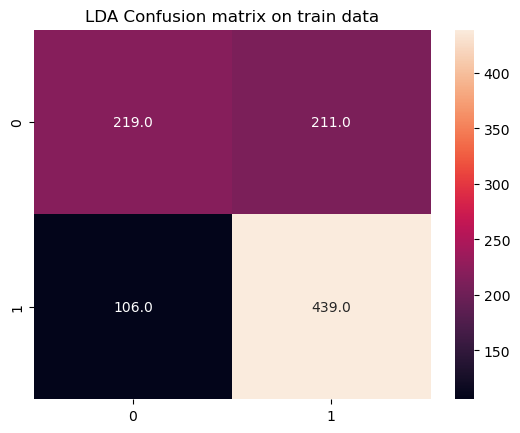

In [1128]:
# for train data
sns.heatmap(confusion_matrix(y_train,y_train_predic),annot=True,fmt='.1f')
plt.title('LDA Confusion matrix on train data')

print('LDA Classification Report on train data \n',classification_report(y_train,y_train_predic))



LDA Classification Report on test data 
               precision    recall  f1-score   support

           0       0.64      0.44      0.52       184
           1       0.65      0.80      0.72       234

    accuracy                           0.64       418
   macro avg       0.64      0.62      0.62       418
weighted avg       0.64      0.64      0.63       418



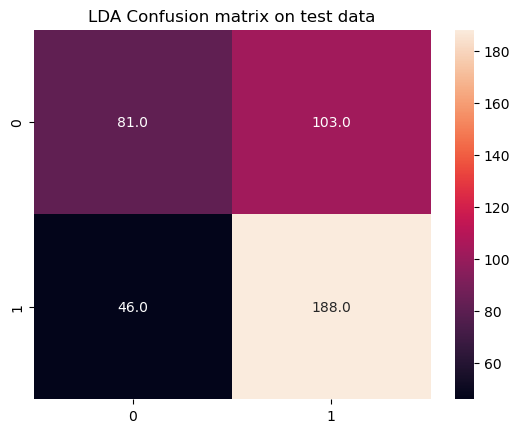

In [1129]:
# for test data
sns.heatmap(confusion_matrix(y_test,y_test_predic),annot=True,fmt='.1f')
plt.title('LDA Confusion matrix on test data')
print('LDA Classification Report on test data \n',classification_report(y_test,y_test_predic))

In [1130]:
lda_model.score(x_test,y_test)

0.6435406698564593

In [1131]:
lda_model.score(x_train,y_train)

0.6748717948717948

Linear Discriminant Analysis ROC AUC score of Train Data =  0.657


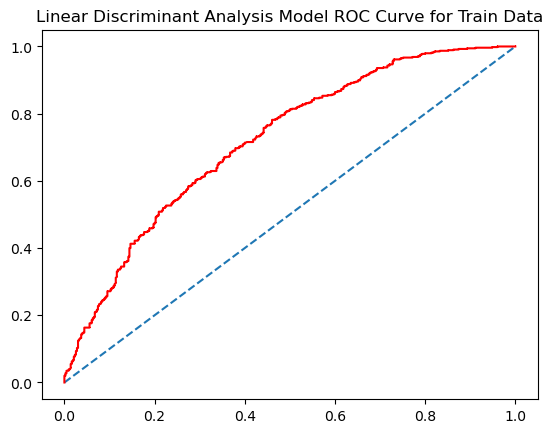

In [1132]:
prob=lda_model.predict_proba(x_train)
prob_train=prob[:,1]
print('Linear Discriminant Analysis ROC AUC score of Train Data = ',roc_auc_score(y_train,y_train_predic).round(3))
train_fpr, train_tpr, train_thresholds=roc_curve(y_train,prob_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr,marker=',',color='r')
plt.title('Linear Discriminant Analysis Model ROC Curve for Train Data');

In [1133]:
df_prob=pd.DataFrame(data=prob,columns=['0-No','1-Yes'],index=range(0,975))
df_prob.T

,0,1,2,3,4,5,6,7,8,9,...,965,966,967,968,969,970,971,972,973,974
0-No,0.689644,0.179351,0.183432,0.387694,0.71348,0.456307,0.472451,0.692721,0.159148,0.304567,...,0.514344,0.39511,0.262263,0.691146,0.181185,0.542361,0.591367,0.399345,0.370459,0.238725
1-Yes,0.310356,0.820649,0.816568,0.612306,0.28652,0.543693,0.527549,0.307279,0.840852,0.695433,...,0.485656,0.60489,0.737737,0.308854,0.818815,0.457639,0.408633,0.600655,0.629541,0.761275


Linear Discriminant Analysis ROC AUC score of Train Data =  0.622


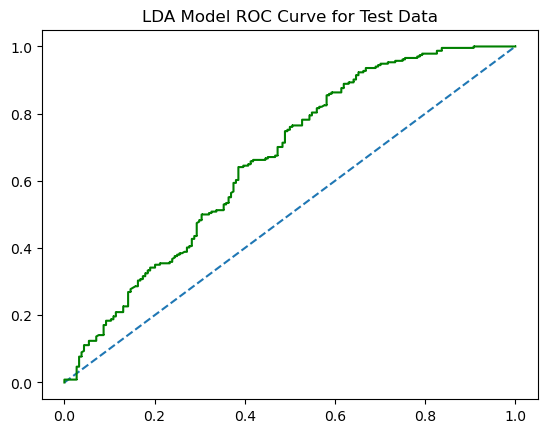

In [1134]:
prob=lda_model.predict_proba(x_test)
prob_test=prob[:,1]
print('Linear Discriminant Analysis ROC AUC score of Train Data = ',roc_auc_score(y_test,y_test_predic).round(3))
test_fpr, test_tpr, test_thresholds=roc_curve(y_test,prob_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr,marker=',',color='g')
plt.title('LDA Model ROC Curve for Test Data');

In [1135]:
df_prob=pd.DataFrame(data=prob,columns=['0-No','1-Yes'],index=range(0,418))
df_prob.T

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0-No,0.280734,0.60973,0.333497,0.286619,0.234016,0.272349,0.287621,0.277177,0.482781,0.235902,...,0.601639,0.751523,0.17943,0.473966,0.427266,0.325738,0.232677,0.362212,0.455008,0.208577
1-Yes,0.719266,0.39027,0.666503,0.713381,0.765984,0.727651,0.712379,0.722823,0.517219,0.764098,...,0.398361,0.248477,0.82057,0.526034,0.572734,0.674262,0.767323,0.637788,0.544992,0.791423


# Decision Tree (CART)

In [1136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [1137]:
dec_model=DecisionTreeClassifier(criterion='gini')
dec_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [1138]:
serie = (pd.DataFrame(dec_model.feature_importances_, columns=['Imp'], index=x_train.columns).sort_values('Imp',ascending=False))
serie

,Imp
Wife_age,0.326891
No_of_children_born,0.252229
standard_of_living,0.092062
Husband_Occupation,0.087675
wife_education,0.083247
Husband_education,0.071186
Wife_Working_Yes,0.039855
Wife_religion_Scientology,0.036158
media_exposure_Not-Exposed,0.010696


In [996]:
from sklearn import tree
train_char_label=['no','yes']
contrac_tree_file= open('C:/Users/hp/Desktop/contrac.dot', mode='w')  #Credit_Tree_File = open('d:\credit_tree.dot','w')
data_dot=tree.export_graphviz(dec_model,out_file=contrac_tree_file,feature_names=x_train.columns,class_names=list(train_char_label))
contrac_tree_file.close()

In [1139]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [1170]:
grid={'criterion':['gini', 'entropy','log_loss'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[5,10,15,20],
      'min_samples_leaf':[1,5,10,15,20],'ccp_alpha':[0.1,0.01,0.001]}

In [1171]:
model_grid=GridSearchCV(estimator=dec_model,param_grid=grid,n_jobs=-1,cv=5,verbose=True)

In [1172]:
model_grid.fit(x_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [1173]:
model_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='log2')

In [1174]:
print(model_grid.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1}


In [1175]:
best_model=DecisionTreeClassifier(ccp_alpha= 0.001,criterion= 'gini',max_depth= 5,max_features= 'log2',min_samples_leaf= 5,random_state=1)

In [1176]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='log2',
                       min_samples_leaf=5, random_state=1)

In [1177]:
feature = (pd.DataFrame(best_model.feature_importances_, columns=['Imp'], index=x_train.columns).sort_values('Imp',ascending=False))
feature

,Imp
No_of_children_born,0.531256
Wife_age,0.145065
standard_of_living,0.123564
wife_education,0.088411
Husband_education,0.061393
media_exposure_Not-Exposed,0.031285
Husband_Occupation,0.019026
Wife_religion_Scientology,0.000000
Wife_Working_Yes,0.000000


In [1019]:
train_char_label=['no','yes']
contra_best_tree_file=open('C:/Users/hp/Desktop/contra_best_new.dot',mode='w')
contra_dot=tree.export_graphviz(best_model,out_file=contra_best_tree_file,feature_names=x_train.columns,class_names=list(train_char_label))
contra_best_tree_file.close()

In [1178]:
best_model.score(x_train,y_train)

0.6994871794871795

In [1179]:
best_model.score(x_test,y_test)

0.6602870813397129

In [1180]:
y_train_predict=best_model.predict(x_train)
y_test_predict=best_model.predict(x_test)

CART Model Classification Report on train data 
               precision    recall  f1-score   support

           0       0.70      0.56      0.62       430
           1       0.70      0.81      0.75       545

    accuracy                           0.70       975
   macro avg       0.70      0.68      0.69       975
weighted avg       0.70      0.70      0.69       975



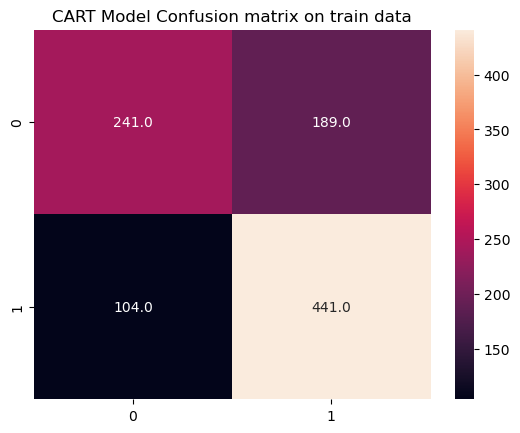

In [1181]:
# for train data
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt='.1f')
plt.title('CART Model Confusion matrix on train data')

print('CART Model Classification Report on train data \n',classification_report(y_train,y_train_predict))

CART Model Classification Report on test data 
               precision    recall  f1-score   support

           0       0.66      0.47      0.55       184
           1       0.66      0.81      0.73       234

    accuracy                           0.66       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.66      0.66      0.65       418



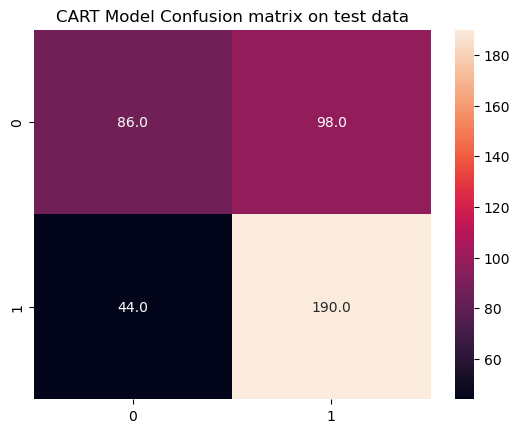

In [1182]:
# for test data
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,fmt='.1f')
plt.title('CART Model Confusion matrix on test data')

print('CART Model Classification Report on test data \n',classification_report(y_test,y_test_predict))


CART Model ROC AUC score of Train Data =  0.685


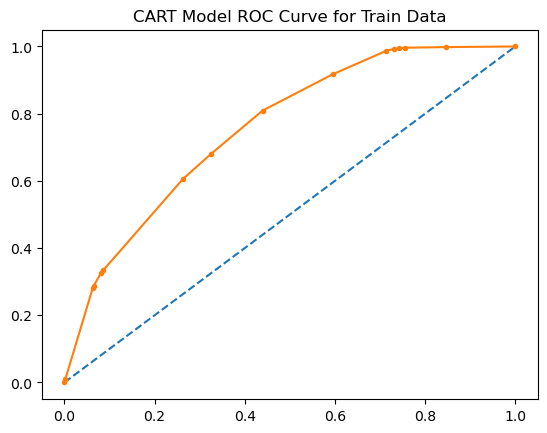

In [1184]:
# roc curve for train data
prob=best_model.predict_proba(x_train)
prob_train=prob[:,1]
print('CART Model ROC AUC score of Train Data = ',roc_auc_score(y_train,y_train_predict).round(3))
train_fpr, train_tpr, train_thresholds=roc_curve(y_train,prob_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr,marker='.')
plt.title('CART Model ROC Curve for Train Data');

In [1185]:
df_prob=pd.DataFrame(data=prob,columns=['0-No','1-Yes'],index=range(0,975))
df_prob.T

,0,1,2,3,4,5,6,7,8,9,...,965,966,967,968,969,970,971,972,973,974
0-No,0.985075,0.150289,0.339286,0.411765,0.975,0.333333,0.339286,0.573034,0.985075,0.531746,...,0.397059,0.150289,0.150289,0.985075,0.339286,0.531746,0.531746,0.531746,0.25,0.339286
1-Yes,0.014925,0.849711,0.660714,0.588235,0.025,0.666667,0.660714,0.426966,0.014925,0.468254,...,0.602941,0.849711,0.849711,0.014925,0.660714,0.468254,0.468254,0.468254,0.75,0.660714


CART Model ROC AUC score of Test Data =  0.64


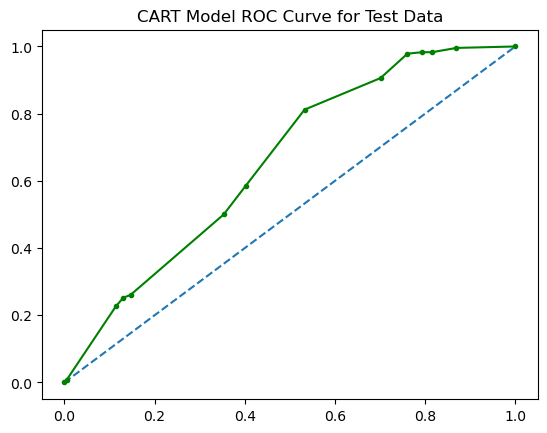

In [1186]:
# roc curve for test data
prob=best_model.predict_proba(x_test)
prob_test=prob[:,1]
print('CART Model ROC AUC score of Test Data = ',roc_auc_score(y_test,y_test_predict).round(3))
test_fpr, test_tpr, test_thresholds=roc_curve(y_test,prob_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr,marker='.',color='g')
plt.title('CART Model ROC Curve for Test Data');

In [1188]:
df_prob=pd.DataFrame(data=prob,columns=['0-No','1-Yes'],index=range(0,418))
df_prob.T

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0-No,0.531746,0.985075,0.411765,0.411765,0.150289,0.339286,0.339286,0.150289,0.411765,0.150289,...,0.339286,0.397059,0.150289,0.339286,0.531746,0.411765,0.531746,0.150289,0.339286,0.339286
1-Yes,0.468254,0.014925,0.588235,0.588235,0.849711,0.660714,0.660714,0.849711,0.588235,0.849711,...,0.660714,0.602941,0.849711,0.660714,0.468254,0.588235,0.468254,0.849711,0.660714,0.660714


In [1030]:
tn, fp, fn, tp=confusion_matrix(y_test,y_test_predict).ravel()

In [1035]:
print('tn:-',tn, 'fp:-',fp, 'fn:-',fn, 'tp:-',tp)

tn:- 86 fp:- 98 fn:- 44 tp:- 190


In [1187]:
prob.shape

(418, 2)